In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr, chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
df2 = pd.read_csv('Dataset_2.csv')

In [4]:
df2.head()

,Test_ID,WBC_Count,Hemoglobin,CEA_Level,CRP_Level,Albumin_Level,Colon_Cancer_Type
0,T5000,9.17,15.67,8.59,5.50,4.10,Type C
1,T5001,9.55,10.61,8.33,11.90,4.66,Type A
2,T5002,4.41,15.13,1.00,13.63,3.14,Type C
3,T5003,9.36,13.16,14.81,4.69,3.85,NaN
4,T5004,4.35,14.96,2.28,9.19,3.17,Type B


In [5]:
df2.shape

(200, 7)

In [6]:
df2.isna().sum()

Test_ID              0
WBC_Count            1
Hemoglobin           3
CEA_Level            2
CRP_Level            0
Albumin_Level        0
Colon_Cancer_Type    9
dtype: int64

In [7]:
wbc_mean_typea = df2[df2['Colon_Cancer_Type'] == 'Type A']['WBC_Count'].mean()
print(wbc_mean_typea)
wbc_mean_typeb = df2[df2['Colon_Cancer_Type'] == 'Type B']['WBC_Count'].mean()
print(wbc_mean_typeb)
wbc_mean_typec = df2[df2['Colon_Cancer_Type'] == 'Type C']['WBC_Count'].mean()
print(wbc_mean_typec)

15.294644010983605
15.077478053207548
13.408261385789476


In [8]:
df2['WBC_Count'] = df2['WBC_Count'].fillna(df2.groupby('Colon_Cancer_Type')['WBC_Count'].transform('mean'))

In [9]:
h_mean_typea = df2[df2['Colon_Cancer_Type'] == 'Type A']['Hemoglobin'].mean()
print(h_mean_typea)
h_mean_typeb = df2[df2['Colon_Cancer_Type'] == 'Type B']['Hemoglobin'].mean()
print(h_mean_typeb)
h_mean_typec = df2[df2['Colon_Cancer_Type'] == 'Type C']['Hemoglobin'].mean()
print(h_mean_typec)

12.962500000000002
13.08509433962264
13.173684210526316


In [10]:
df2['Hemoglobin'] = df2['Hemoglobin'].fillna(df2.groupby('Colon_Cancer_Type')['Hemoglobin'].transform('mean'))

In [11]:
cea_mean_typea = df2[df2['Colon_Cancer_Type'] == 'Type A']['CEA_Level'].mean()
print(cea_mean_typea)
cea_mean_typeb = df2[df2['Colon_Cancer_Type'] == 'Type B']['CEA_Level'].mean()
print(cea_mean_typeb)
cea_mean_typec = df2[df2['Colon_Cancer_Type'] == 'Type C']['CEA_Level'].mean()
print(cea_mean_typec)

7.673934426229509
7.821296296296295
7.470799999999998


In [12]:
df2['CEA_Level'] = df2['CEA_Level'].fillna(df2.groupby('Colon_Cancer_Type')['CEA_Level'].transform('mean'))

In [13]:
df2.dropna(inplace=True)

In [14]:
df2.isna().sum()

Test_ID              0
WBC_Count            0
Hemoglobin           0
CEA_Level            0
CRP_Level            0
Albumin_Level        0
Colon_Cancer_Type    0
dtype: int64

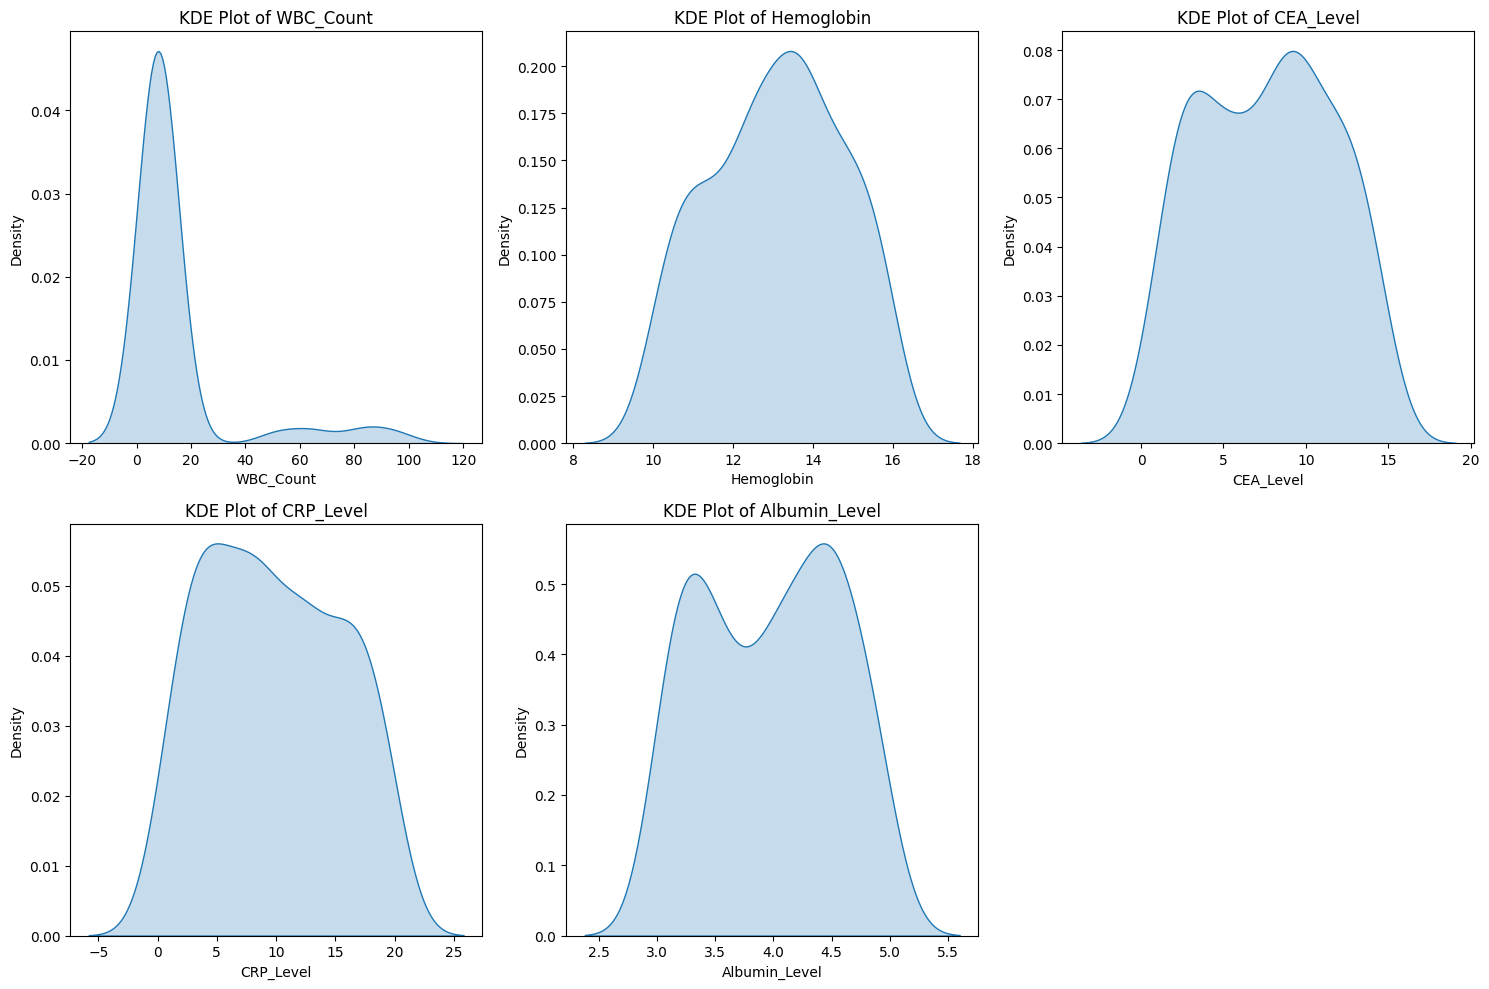

In [15]:
numerical_cols = df2.columns.drop(['Test_ID', 'Colon_Cancer_Type'])

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(df2[col], fill=True)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

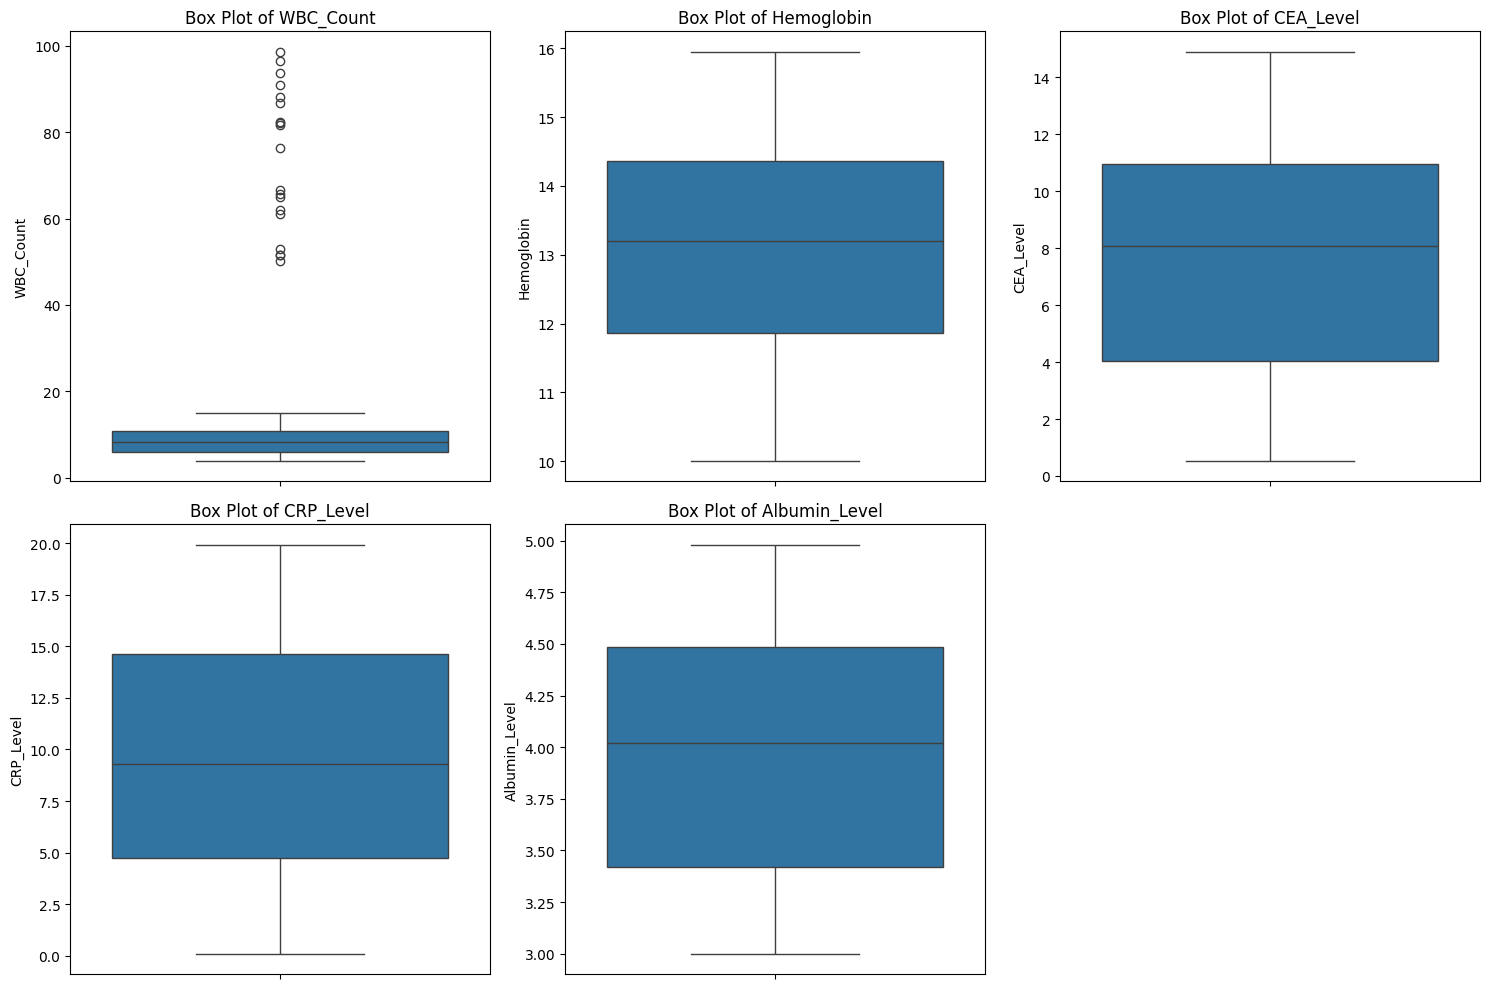

In [16]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df2[col]) 
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [17]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1                
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter rows within the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [18]:
df2_cleaned = remove_outliers_iqr(df2, numerical_cols)

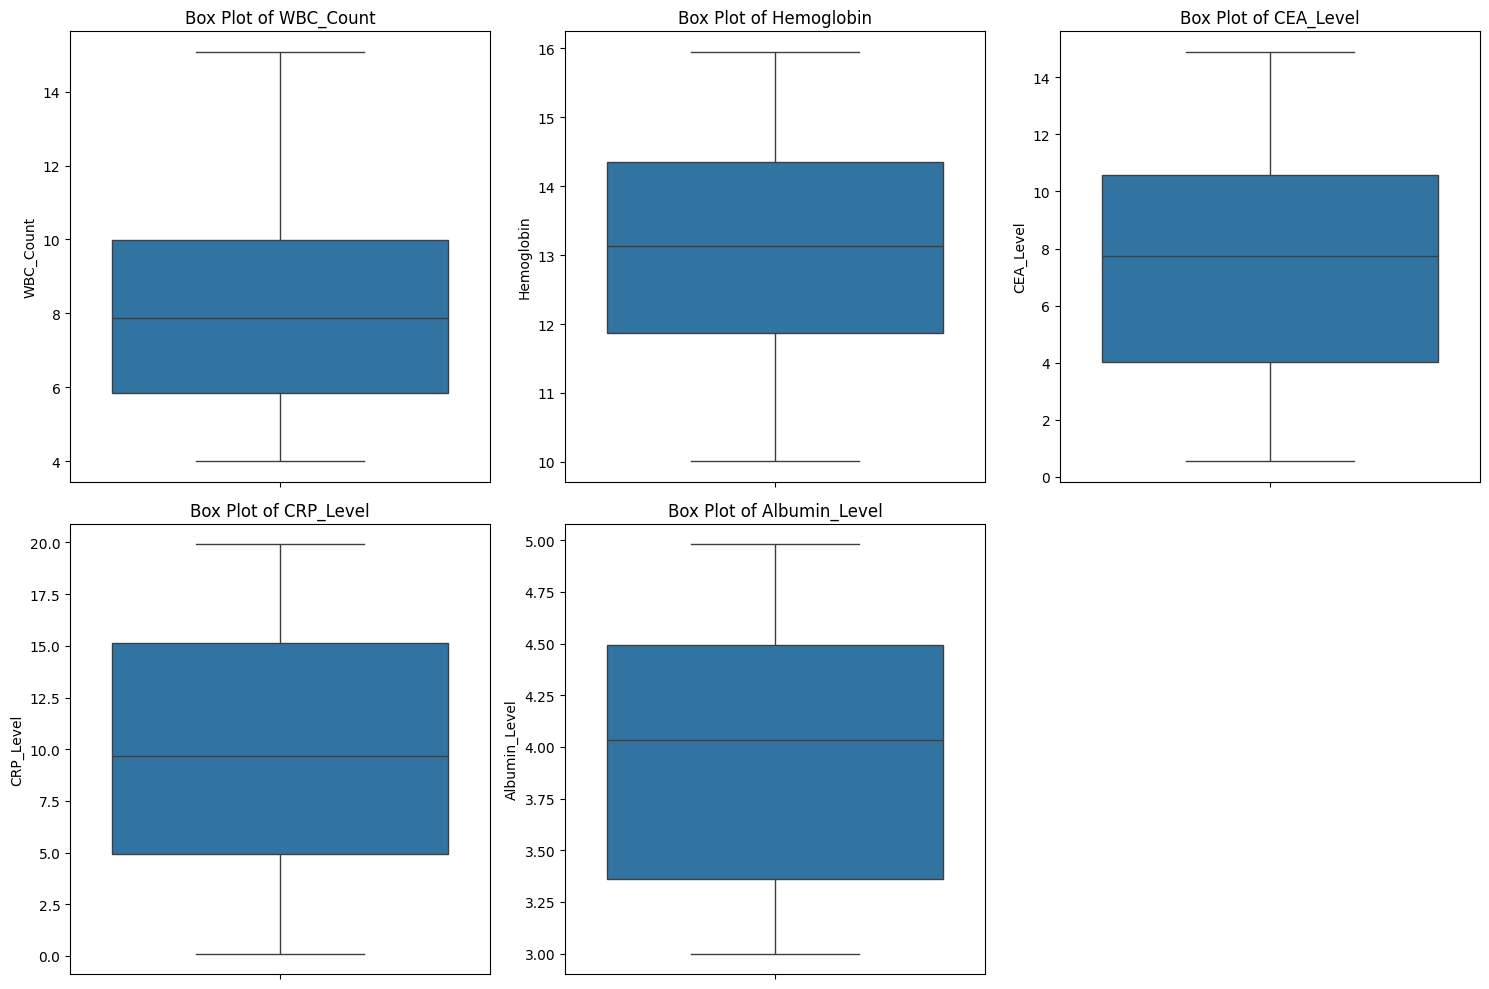

In [19]:
# after removing outliers

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df2_cleaned[col]) 
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

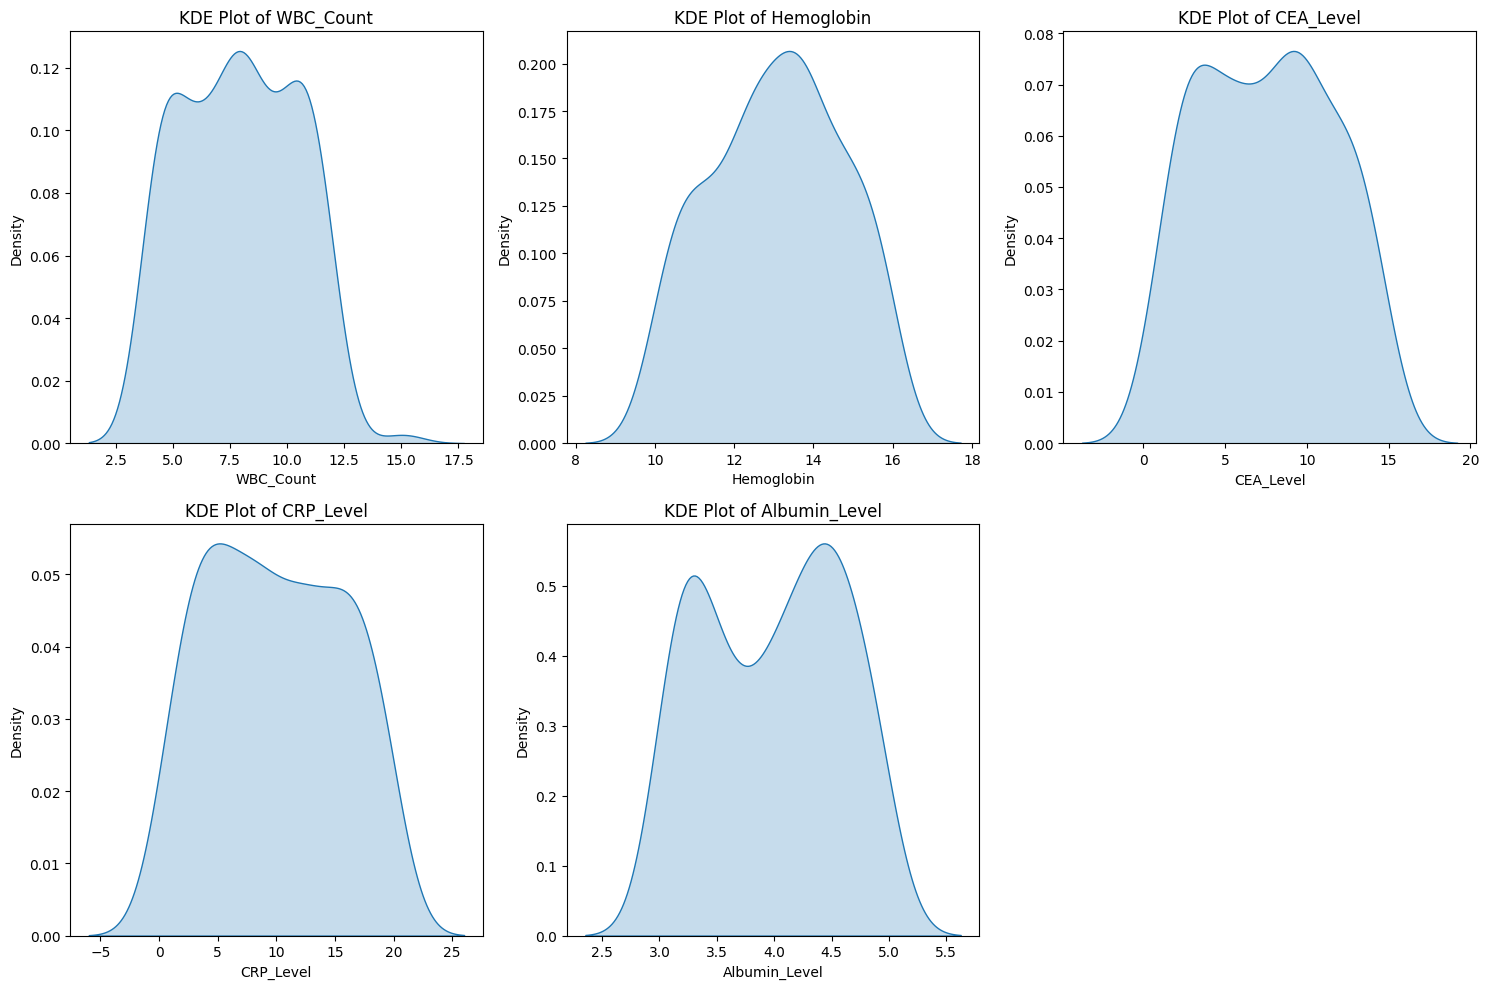

In [20]:
# after removing outliers

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(df2_cleaned[col], fill=True)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [21]:
# Constructing new features

df2_cleaned['albumin_crp_ratio'] = df2_cleaned['Albumin_Level'] / df2_cleaned['CRP_Level']
df2_cleaned['inflammatory_index'] = (df2_cleaned['CRP_Level'] * df2_cleaned['WBC_Count']) / df2_cleaned['Albumin_Level']
df2_cleaned['wbc_crp_ratio'] = df2_cleaned['WBC_Count'] / df2_cleaned['CRP_Level']

In [22]:
df2_cleaned.head()

,Test_ID,WBC_Count,Hemoglobin,CEA_Level,CRP_Level,Albumin_Level,Colon_Cancer_Type,albumin_crp_ratio,inflammatory_index,wbc_crp_ratio
0,T5000,9.17,15.670000,8.59,5.50,4.10,Type C,0.745455,12.301220,1.667273
1,T5001,9.55,10.610000,8.33,11.90,4.66,Type A,0.391597,24.387339,0.802521
2,T5002,4.41,15.130000,1.00,13.63,3.14,Type C,0.230374,19.142771,0.323551
4,T5004,4.35,14.960000,2.28,9.19,3.17,Type B,0.344940,12.610883,0.473341
5,T5005,8.71,13.085094,3.85,3.89,4.03,Type B,1.035990,8.407419,2.239075


In [23]:
label_mapping = {   
    'Type A':1,
    'Type B':2,
    'Type C':3
}
df2_cleaned['Colon_Cancer_Type'] = df2_cleaned['Colon_Cancer_Type'].map(label_mapping)

In [24]:
numerical_features = df2_cleaned.columns.drop(['Test_ID', 'Colon_Cancer_Type'])
corr = pd.DataFrame(index=['Colon_Cancer_Type'], columns=numerical_features)
for feature in numerical_features:
    correlation, _ = spearmanr(df2_cleaned[feature], 
                                    df2_cleaned['Colon_Cancer_Type'])
    
    corr.loc['Colon_Cancer_Type', feature] = correlation


corr

,WBC_Count,Hemoglobin,CEA_Level,CRP_Level,Albumin_Level,albumin_crp_ratio,inflammatory_index,wbc_crp_ratio
Colon_Cancer_Type,-0.020393,0.089698,-0.00282,-0.093389,0.10478,0.122936,-0.125947,0.074297


Text(0.5, 1.0, 'Random Forest Feature Importance')

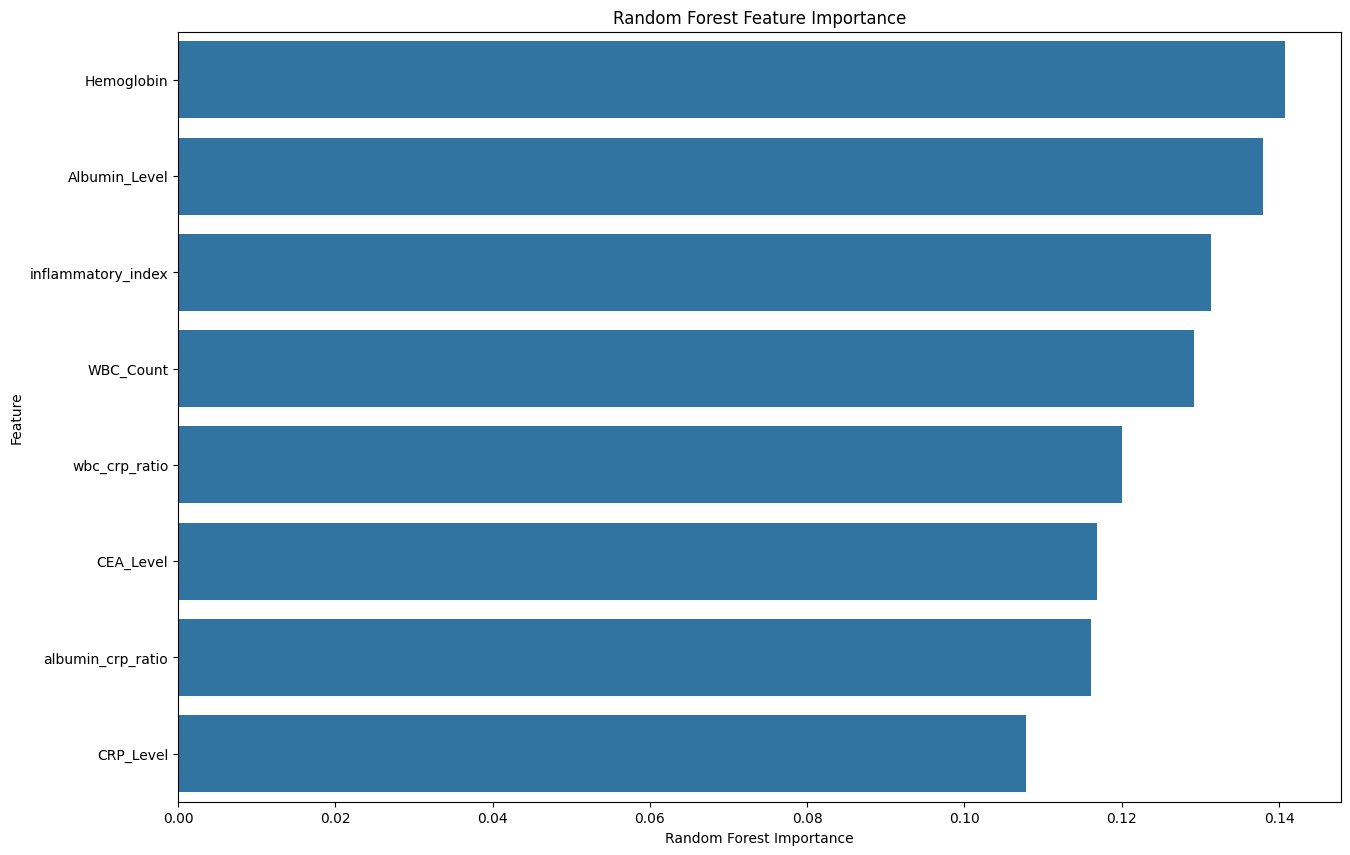

In [25]:
X = df2_cleaned.drop(['Test_ID', 'Colon_Cancer_Type'], axis=1)
y = df2_cleaned['Colon_Cancer_Type']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest Importance': rf.feature_importances_
})
rf_importance = rf_importance.sort_values('Random Forest Importance', ascending=False)


plt.figure(figsize=(15, 10))

sns.barplot(data=rf_importance, x='Random Forest Importance', y='Feature')
plt.title('Random Forest Feature Importance')

In [26]:
reduced_df2 = df2_cleaned[['Hemoglobin', 'inflammatory_index', 'Albumin_Level', 'Colon_Cancer_Type']]
reduced_df2.to_csv('reduced_df2.csv', index=False) 